In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pm4py
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [2]:
#Original data 

log = pm4py.read_xes('Road_Traffic_Fine_Management_Process.xes.gz')
Data = pm4py.convert_to_dataframe(log)

Data.head(20)


parsing log, completed traces ::   0%|          | 0/150370 [00:00<?, ?it/s]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
0,35.0,561,NIL,Create Fine,A,0.0,complete,2006-07-24 00:00:00+02:00,157.0,0.0,A1,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-05 00:00:00+01:00,NaN,NaN,A1,11.0,NaN,NaN,NaN,NaN
2,35.0,561,NIL,Create Fine,A,0.0,complete,2006-08-02 00:00:00+02:00,157.0,0.0,A100,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-12 00:00:00+01:00,NaN,NaN,A100,11.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-01-15 00:00:00+01:00,NaN,NaN,A100,NaN,P,P,NaN,NaN
5,71.5,NaN,NaN,Add penalty,NaN,NaN,complete,2007-03-16 00:00:00+01:00,NaN,NaN,A100,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Send for Credit Collection,NaN,NaN,complete,2009-03-30 00:00:00+02:00,NaN,NaN,A100,NaN,NaN,NaN,NaN,NaN
7,36.0,561,NIL,Create Fine,A,0.0,complete,2007-03-09 00:00:00+01:00,157.0,0.0,A10000,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2007-07-17 00:00:00+02:00,NaN,NaN,A10000,13.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-08-02 00:00:00+02:00,NaN,NaN,A10000,NaN,P,P,NaN,NaN


In [3]:
# Make a new Dataframe suitable for process mining 

df = Data[['org:resource','case:concept:name','concept:name','time:timestamp','amount','points','vehicleClass','totalPaymentAmount','expense']].copy()
df['Dates'] = pd.to_datetime(df['time:timestamp'],utc=True).dt.date
df['year']= pd.DatetimeIndex(df['Dates']).year
df['month']= pd.DatetimeIndex(df['Dates']).month
df.head(50)

,org:resource,case:concept:name,concept:name,time:timestamp,amount,points,vehicleClass,totalPaymentAmount,expense,Dates,year,month
0,561,A1,Create Fine,2006-07-24 00:00:00+02:00,35.0,0.0,A,0.0,NaN,2006-07-23,2006,7
1,NaN,A1,Send Fine,2006-12-05 00:00:00+01:00,NaN,NaN,NaN,NaN,11.0,2006-12-04,2006,12
2,561,A100,Create Fine,2006-08-02 00:00:00+02:00,35.0,0.0,A,0.0,NaN,2006-08-01,2006,8
3,NaN,A100,Send Fine,2006-12-12 00:00:00+01:00,NaN,NaN,NaN,NaN,11.0,2006-12-11,2006,12
4,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,2007-01-14,2007,1
5,NaN,A100,Add penalty,2007-03-16 00:00:00+01:00,71.5,NaN,NaN,NaN,NaN,2007-03-15,2007,3
6,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+02:00,NaN,NaN,NaN,NaN,NaN,2009-03-29,2009,3
7,561,A10000,Create Fine,2007-03-09 00:00:00+01:00,36.0,0.0,A,0.0,NaN,2007-03-08,2007,3
8,NaN,A10000,Send Fine,2007-07-17 00:00:00+02:00,NaN,NaN,NaN,NaN,13.0,2007-07-16,2007,7
9,NaN,A10000,Insert Fine Notification,2007-08-02 00:00:00+02:00,NaN,NaN,NaN,NaN,NaN,2007-08-01,2007,8


In [4]:
#Replace NAN Values in class and points for similar cases 
df['points'] = df['points'].fillna(0)
df['vehicleClass'] = df['vehicleClass'].fillna(0)
df['amount'] = df['amount'].fillna(0)
df.loc[df['case:concept:name']=='C20535']
df['points'] = df['points'].replace(to_replace=0, method='ffill')
df.loc[df['concept:name']=='V9996']
df['vehicleClass'] = df['vehicleClass'].replace(to_replace=0, method='ffill')
df



,org:resource,case:concept:name,concept:name,time:timestamp,amount,points,vehicleClass,totalPaymentAmount,expense,Dates,year,month
0,561,A1,Create Fine,2006-07-24 00:00:00+02:00,35.0,0.0,A,0.0,NaN,2006-07-23,2006,7
1,NaN,A1,Send Fine,2006-12-05 00:00:00+01:00,0.0,0.0,A,NaN,11.00,2006-12-04,2006,12
2,561,A100,Create Fine,2006-08-02 00:00:00+02:00,35.0,0.0,A,0.0,NaN,2006-08-01,2006,8
3,NaN,A100,Send Fine,2006-12-12 00:00:00+01:00,0.0,0.0,A,NaN,11.00,2006-12-11,2006,12
4,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+01:00,0.0,0.0,A,NaN,NaN,2007-01-14,2007,1
...,...,...,...,...,...,...,...,...,...,...,...,...
561465,25,V9999,Create Fine,2002-09-07 00:00:00+02:00,131.0,3.0,A,0.0,NaN,2002-09-06,2002,9
561466,NaN,V9999,Send Fine,2002-10-25 00:00:00+02:00,0.0,3.0,A,NaN,15.16,2002-10-24,2002,10
561467,NaN,V9999,Insert Fine Notification,2002-11-04 00:00:00+01:00,0.0,3.0,A,NaN,NaN,2002-11-03,2002,11
561468,NaN,V9999,Add penalty,2003-01-03 00:00:00+01:00,262.0,3.0,A,NaN,NaN,2003-01-02,2003,1


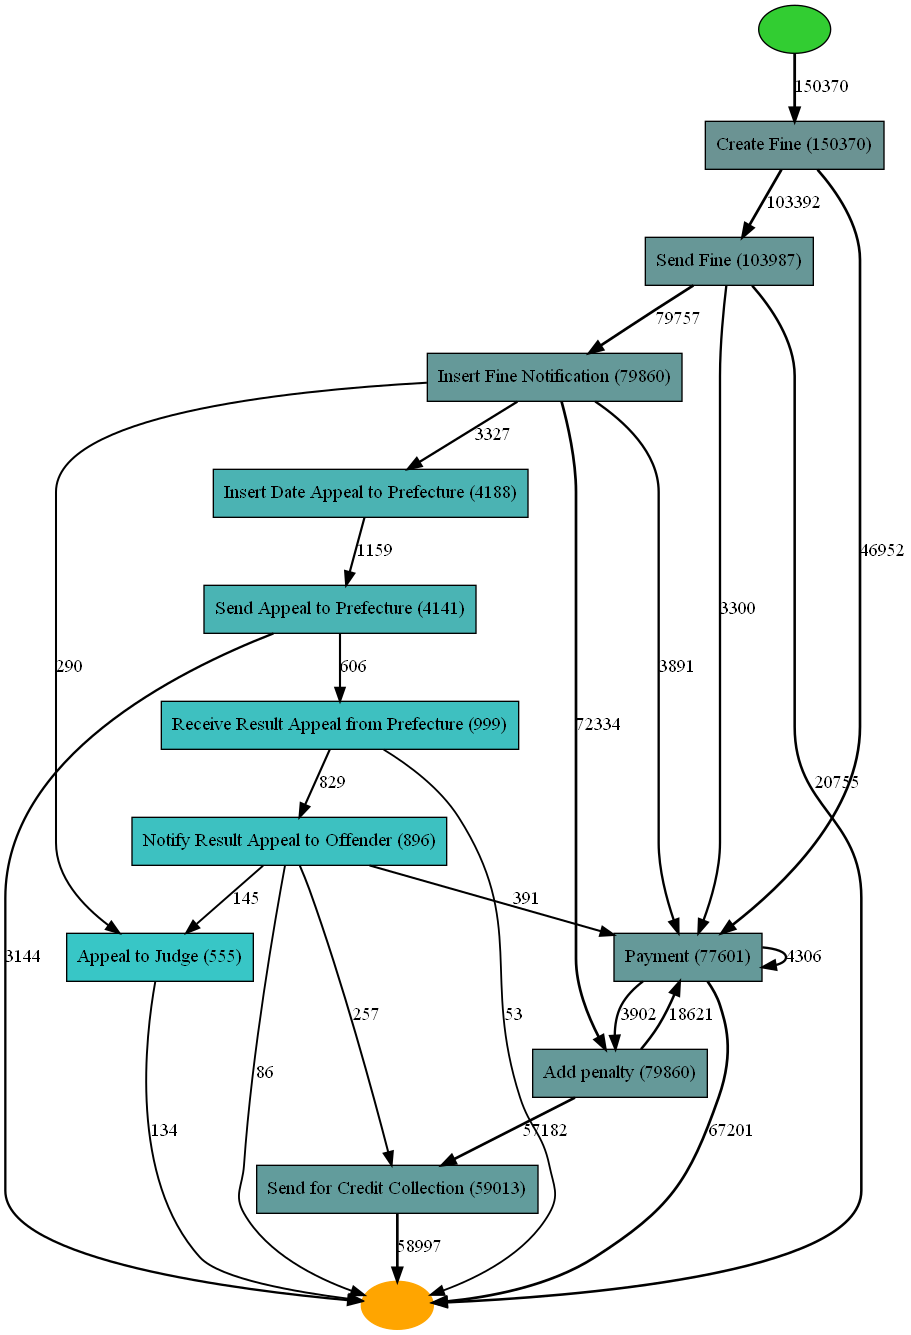

<Figure size 432x288 with 0 Axes>

In [5]:
#Modeling of the unfiltered process 
heu_net = pm4py.discover_heuristics_net(df, dependency_threshold=0.99)
pm4py.view_heuristics_net(heu_net)
plt.savefig('books_read.png')


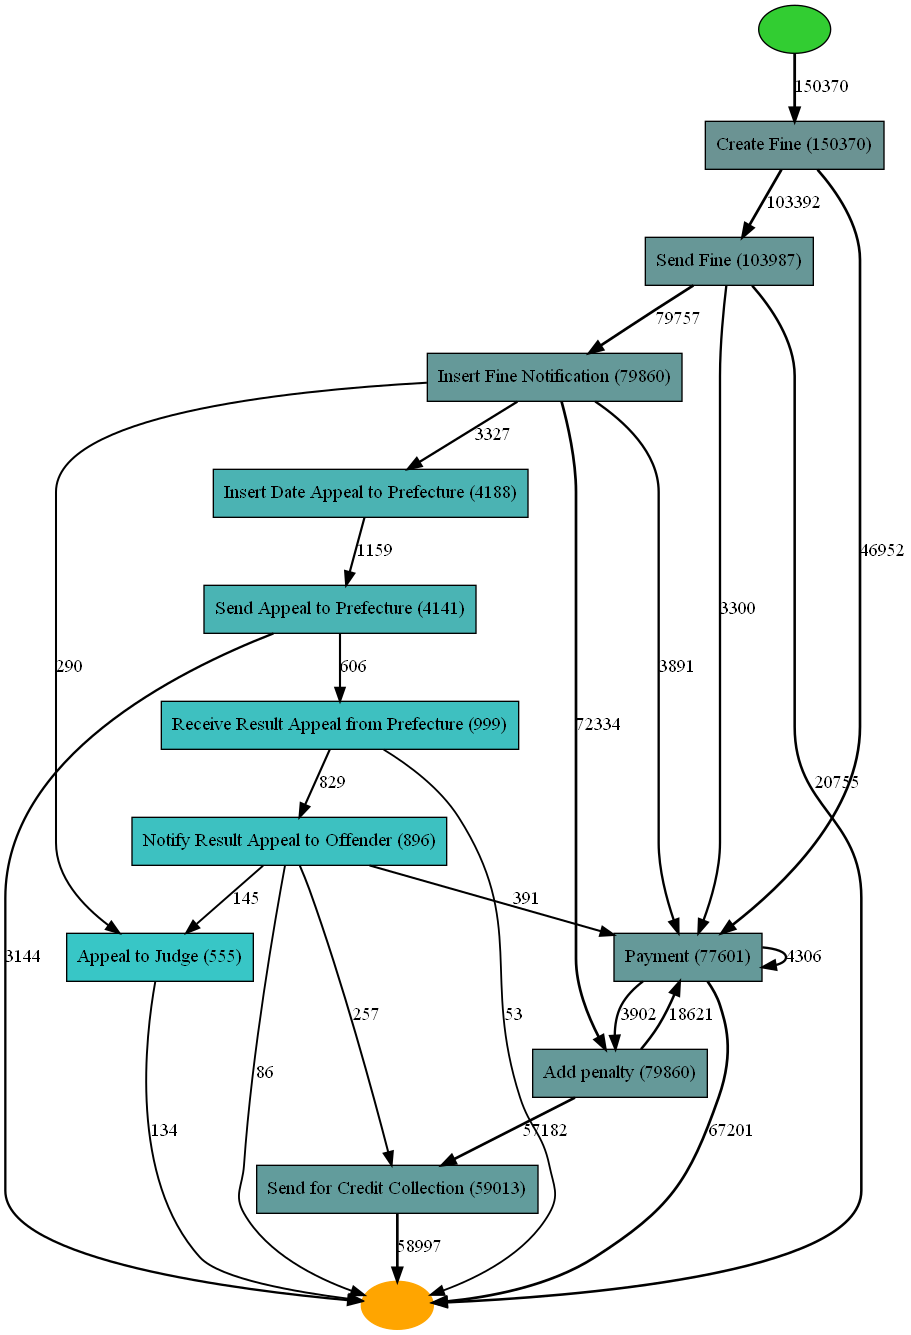

In [6]:
#Fitler and model Data acc to specific start activity rules out uncomplete processes 
filtered = pm4py.filter_start_activities(df,{'Create Fine'})
Filtered_Data= pd.DataFrame(filtered)
heu_net = pm4py.discover_heuristics_net(Filtered_Data, dependency_threshold=0.99)
pm4py.view_heuristics_net(heu_net)

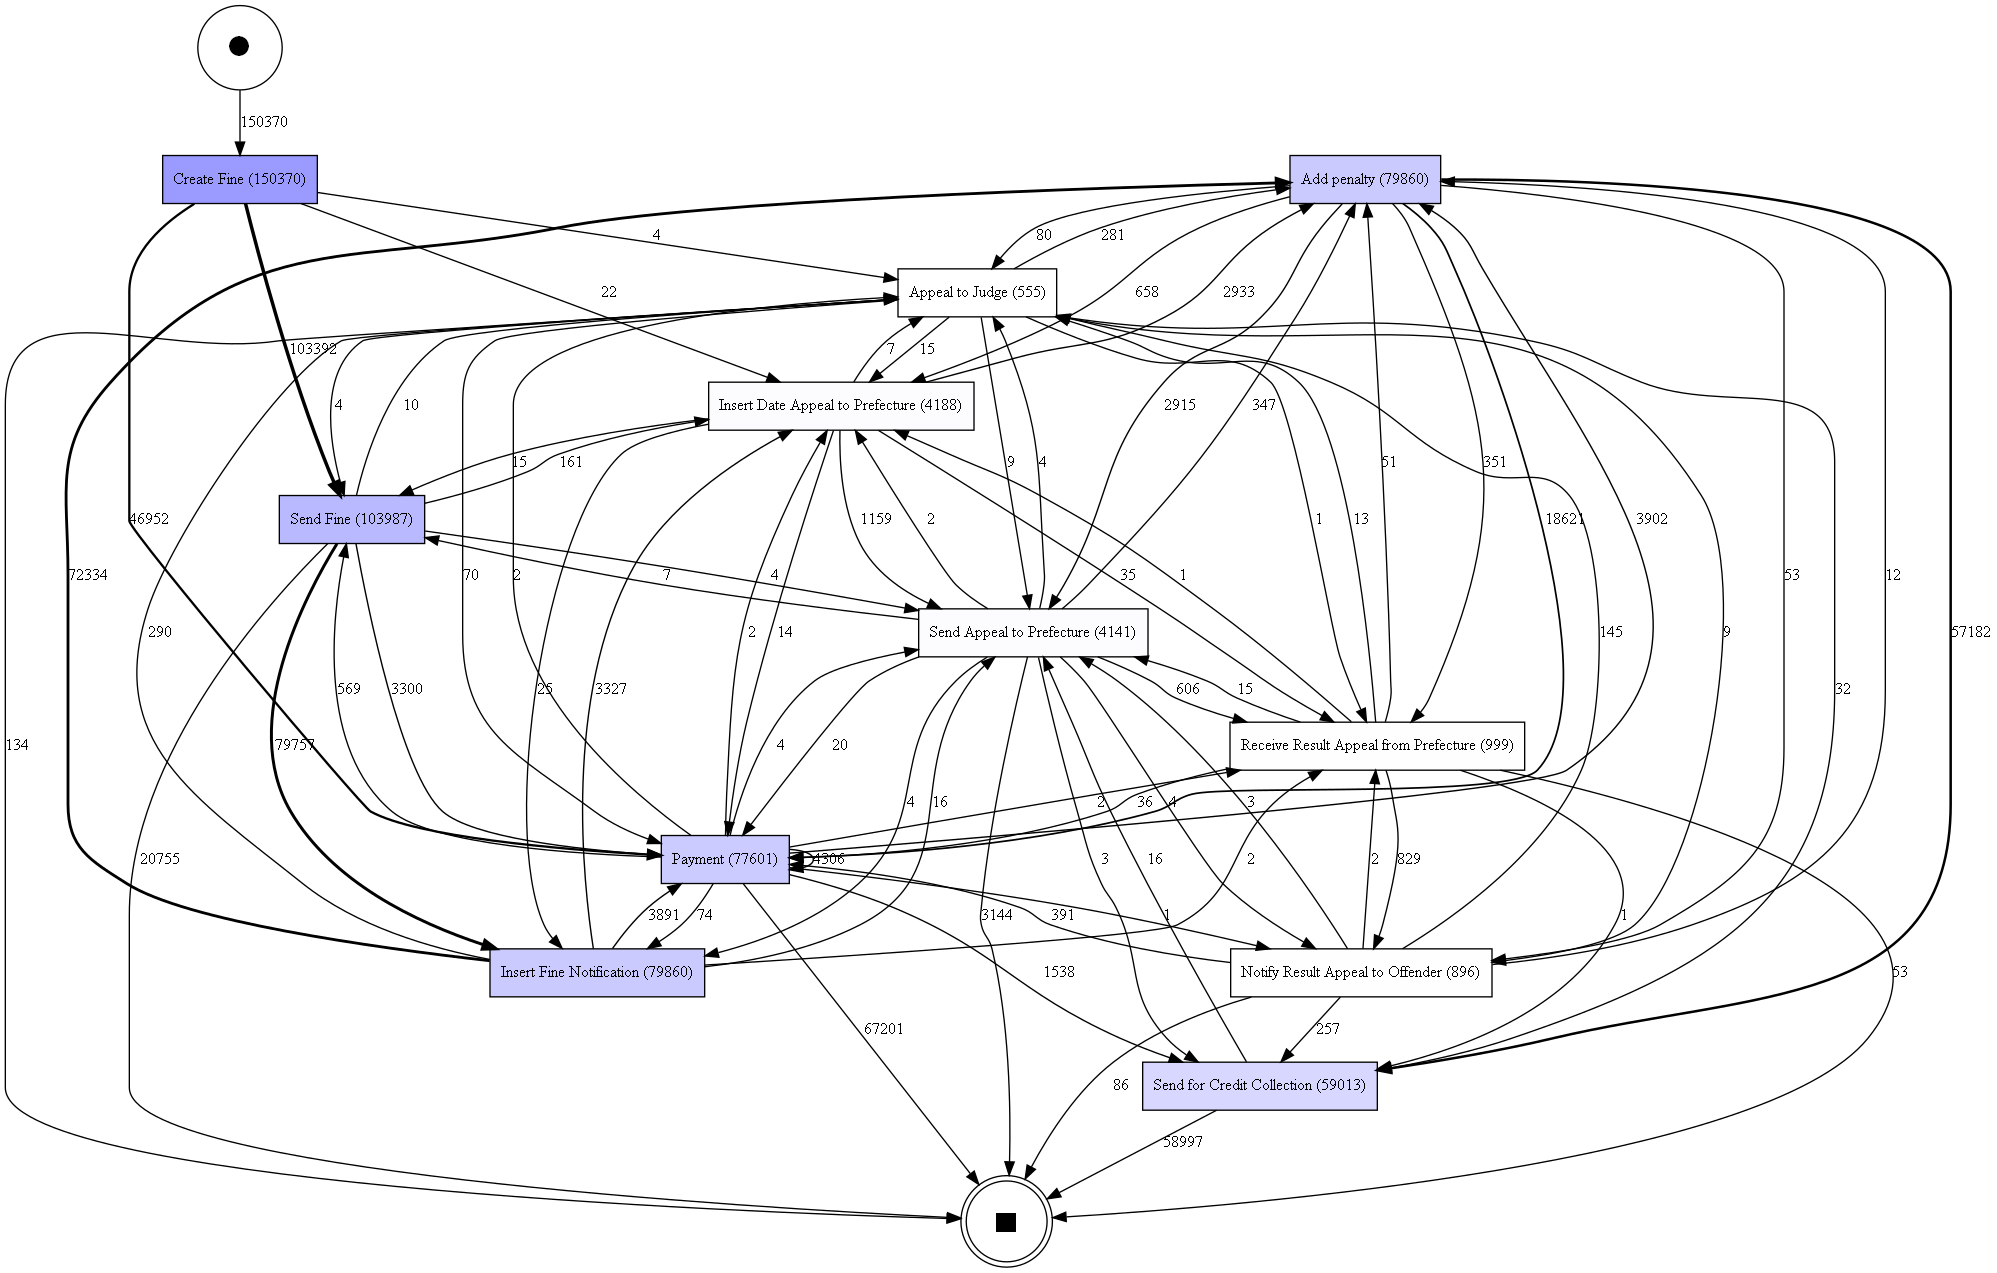

In [7]:
dfg, start_activities, end_activities = pm4py.discover_dfg(Filtered_Data)

pm4py.view_dfg(dfg, start_activities, end_activities)

--Cleaning Data ---

In [9]:
#Get the most Frequent Trace Variant using K Variant filtering (Also done using ProM)
k = 5
filtered_log = pm4py.filter_variants_top_k(Filtered_Data, k)
print(filtered_log) 




       org:resource case:concept:name                concept:name  \
0               561                A1                 Create Fine   
1               NaN                A1                   Send Fine   
2               561              A100                 Create Fine   
3               NaN              A100                   Send Fine   
4               NaN              A100    Insert Fine Notification   
...             ...               ...                         ...   
561465           25             V9999                 Create Fine   
561466          NaN             V9999                   Send Fine   
561467          NaN             V9999    Insert Fine Notification   
561468          NaN             V9999                 Add penalty   
561469          NaN             V9999  Send for Credit Collection   

                   time:timestamp  amount  points vehicleClass  \
0       2006-07-24 00:00:00+02:00    35.0     0.0            A   
1       2006-12-05 00:00:00+01:00     0

In [10]:
FFD = pd.DataFrame(filtered_log)
FFD.head(20)

,org:resource,case:concept:name,concept:name,time:timestamp,amount,points,vehicleClass,totalPaymentAmount,expense,Dates,year,month,start_timestamp
0,561,A1,Create Fine,2006-07-24 00:00:00+02:00,35.0,0.0,A,0.0,NaN,2006-07-23,2006,7,2006-07-24 00:00:00+02:00
1,NaN,A1,Send Fine,2006-12-05 00:00:00+01:00,0.0,0.0,A,NaN,11.0,2006-12-04,2006,12,2006-12-05 00:00:00+01:00
2,561,A100,Create Fine,2006-08-02 00:00:00+02:00,35.0,0.0,A,0.0,NaN,2006-08-01,2006,8,2006-08-02 00:00:00+02:00
3,NaN,A100,Send Fine,2006-12-12 00:00:00+01:00,0.0,0.0,A,NaN,11.0,2006-12-11,2006,12,2006-12-12 00:00:00+01:00
4,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+01:00,0.0,0.0,A,NaN,NaN,2007-01-14,2007,1,2007-01-15 00:00:00+01:00
5,NaN,A100,Add penalty,2007-03-16 00:00:00+01:00,71.5,0.0,A,NaN,NaN,2007-03-15,2007,3,2007-03-16 00:00:00+01:00
6,NaN,A100,Send for Credit Collection,2009-03-30 00:00:00+02:00,0.0,0.0,A,NaN,NaN,2009-03-29,2009,3,2009-03-30 00:00:00+02:00
7,561,A10000,Create Fine,2007-03-09 00:00:00+01:00,36.0,0.0,A,0.0,NaN,2007-03-08,2007,3,2007-03-09 00:00:00+01:00
8,NaN,A10000,Send Fine,2007-07-17 00:00:00+02:00,0.0,0.0,A,NaN,13.0,2007-07-16,2007,7,2007-07-17 00:00:00+02:00
9,NaN,A10000,Insert Fine Notification,2007-08-02 00:00:00+02:00,0.0,0.0,A,NaN,NaN,2007-08-01,2007,8,2007-08-02 00:00:00+02:00


In [11]:
#Confirm the most frequent events 
FFD['concept:name'].unique()

array(['Create Fine', 'Send Fine', 'Insert Fine Notification',
       'Add penalty', 'Send for Credit Collection', 'Payment'],
      dtype=object)

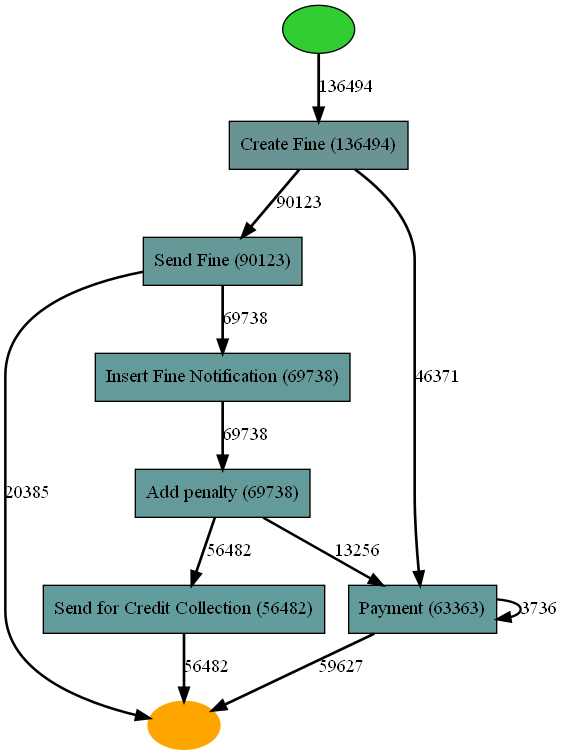

In [12]:
heu_net = pm4py.discover_heuristics_net(FFD, dependency_threshold=0.99)
pm4py.view_heuristics_net(heu_net)

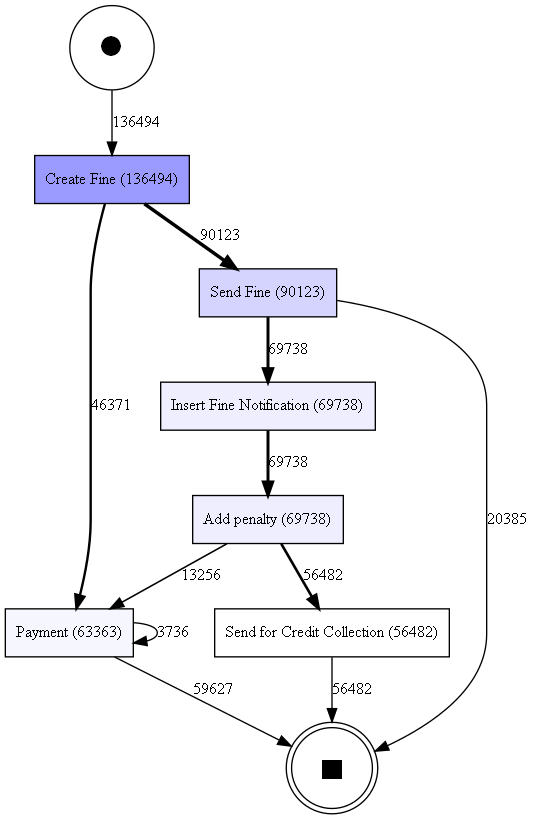

In [13]:
dfg, start_activities, end_activities = pm4py.discover_dfg(FFD)

pm4py.view_dfg(dfg, start_activities, end_activities)

In [14]:
#Define Bottleneck of process 

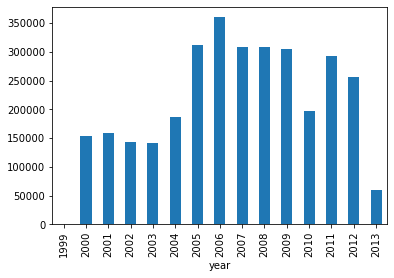

In [15]:
FFD.groupby('year').totalPaymentAmount.sum().plot.bar()
plt.savefig('Fines_per_year.png')

<AxesSubplot:title={'center':'Number of events per event type'}>

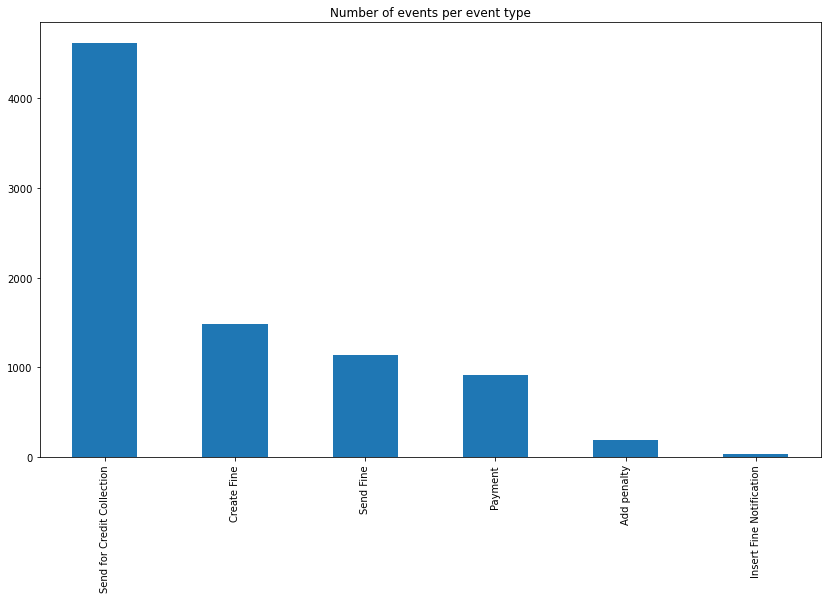

In [16]:
# Investigation of the processes on 2013 
fines2013=FFD.loc[FFD['year']==2013]
fines2013['concept:name'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of events per event type")

In [16]:
#Process started in 8/2009 and ended in 4/2013 
FFD.loc[FFD['case:concept:name']=='A29441']

,org:resource,case:concept:name,concept:name,time:timestamp,amount,points,vehicleClass,totalPaymentAmount,expense,Dates,year,month,start_timestamp
40351,537,A29441,Create Fine,2009-09-01 00:00:00+02:00,38.0,2.0,A,0.0,NaN,2009-08-31,2009,8,2009-09-01 00:00:00+02:00
40352,NaN,A29441,Send Fine,2009-12-18 00:00:00+01:00,0.0,2.0,A,NaN,13.5,2009-12-17,2009,12,2009-12-18 00:00:00+01:00
40353,NaN,A29441,Insert Fine Notification,2010-01-24 00:00:00+01:00,0.0,2.0,A,NaN,NaN,2010-01-23,2010,1,2010-01-24 00:00:00+01:00
40354,NaN,A29441,Add penalty,2010-03-25 00:00:00+01:00,77.5,2.0,A,NaN,NaN,2010-03-24,2010,3,2010-03-25 00:00:00+01:00
40355,NaN,A29441,Send for Credit Collection,2013-04-24 00:00:00+02:00,0.0,2.0,A,NaN,NaN,2013-04-23,2013,4,2013-04-24 00:00:00+02:00


In [17]:
#Same goes here 
df.loc[df['case:concept:name']=='A41320']


,org:resource,case:concept:name,concept:name,time:timestamp,amount,points,vehicleClass,totalPaymentAmount,expense,Dates,year,month
62682,561,A41320,Create Fine,2009-05-12 00:00:00+02:00,38.0,2.0,A,0.0,NaN,2009-05-11,2009,5
62683,NaN,A41320,Send Fine,2009-07-28 00:00:00+02:00,0.0,2.0,A,NaN,13.5,2009-07-27,2009,7
62684,NaN,A41320,Insert Fine Notification,2009-08-03 00:00:00+02:00,0.0,2.0,A,NaN,NaN,2009-08-02,2009,8
62685,NaN,A41320,Add penalty,2009-10-02 00:00:00+02:00,77.5,2.0,A,NaN,NaN,2009-10-01,2009,10
62686,NaN,A41320,Send for Credit Collection,2013-04-24 00:00:00+02:00,0.0,2.0,A,NaN,NaN,2013-04-23,2013,4


In [18]:
corr = FFD.corr()
corr.style.background_gradient(cmap="BuPu")

,amount,points,totalPaymentAmount,expense,year,month
amount,1.000000,0.130254,-0.338562,nan,0.006804,-0.019158
points,0.130254,1.000000,0.067106,-0.100034,0.141941,0.001798
totalPaymentAmount,-0.338562,0.067106,1.000000,nan,0.129331,0.056812
expense,nan,-0.100034,nan,1.000000,0.532626,-0.032775
year,0.006804,0.141941,0.129331,0.532626,1.000000,-0.084733
month,-0.019158,0.001798,0.056812,-0.032775,-0.084733,1.000000


In [19]:
#We find the highest correlation between number of points and the amount paid for specific event 
FilteredFines = FFD.loc[FFD['concept:name']=='Create Fine']
FilteredFines.loc[FilteredFines['points']==1]


,org:resource,case:concept:name,concept:name,time:timestamp,amount,points,vehicleClass,totalPaymentAmount,expense,Dates,year,month,start_timestamp
293296,56,S109021,Create Fine,2005-12-24 00:00:00+01:00,68.0,1.0,M,0.0,NaN,2005-12-23,2005,12,2005-12-24 00:00:00+01:00


In [20]:
fine2005 = FilteredFines.loc[FilteredFines['points']==2]
fine2005.loc[fine2005['year']==2005]


,org:resource,case:concept:name,concept:name,time:timestamp,amount,points,vehicleClass,totalPaymentAmount,expense,Dates,year,month,start_timestamp
87830,31,C15200,Create Fine,2005-05-09 00:00:00+02:00,35.0,2.0,M,0.0,NaN,2005-05-08,2005,5,2005-05-09 00:00:00+02:00
87913,34,C15269,Create Fine,2005-07-16 00:00:00+02:00,21.0,2.0,C,0.0,NaN,2005-07-15,2005,7,2005-07-16 00:00:00+02:00
88550,53,C15821,Create Fine,2005-07-29 00:00:00+02:00,68.0,2.0,C,0.0,NaN,2005-07-28,2005,7,2005-07-29 00:00:00+02:00
90731,40,C17423,Create Fine,2005-12-18 00:00:00+01:00,143.0,2.0,C,0.0,NaN,2005-12-17,2005,12,2005-12-18 00:00:00+01:00
90747,840,C17436,Create Fine,2005-08-12 00:00:00+02:00,143.0,2.0,M,0.0,NaN,2005-08-11,2005,8,2005-08-12 00:00:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539815,37,V15475,Create Fine,2005-12-10 00:00:00+01:00,143.0,2.0,A,0.0,NaN,2005-12-09,2005,12,2005-12-10 00:00:00+01:00
539820,11,V15477,Create Fine,2005-12-13 00:00:00+01:00,143.0,2.0,A,0.0,NaN,2005-12-12,2005,12,2005-12-13 00:00:00+01:00
539840,55,V15486,Create Fine,2005-09-20 00:00:00+02:00,143.0,2.0,A,0.0,NaN,2005-09-19,2005,9,2005-09-20 00:00:00+02:00
539857,50,V15494,Create Fine,2005-12-27 00:00:00+01:00,143.0,2.0,A,0.0,NaN,2005-12-26,2005,12,2005-12-27 00:00:00+01:00


In [21]:
fine2005 = FilteredFines.loc[FilteredFines['points']==3]
fine2005.loc[fine2005['year']==2005]

,org:resource,case:concept:name,concept:name,time:timestamp,amount,points,vehicleClass,totalPaymentAmount,expense,Dates,year,month,start_timestamp
91221,43,C17742,Create Fine,2005-04-18 00:00:00+02:00,35.0,3.0,A,0.0,NaN,2005-04-17,2005,4,2005-04-18 00:00:00+02:00
91226,57,C17745,Create Fine,2005-03-17 00:00:00+01:00,143.0,3.0,A,0.0,NaN,2005-03-16,2005,3,2005-03-17 00:00:00+01:00
91231,58,C17765,Create Fine,2005-04-01 00:00:00+02:00,35.0,3.0,A,0.0,NaN,2005-03-31,2005,3,2005-04-01 00:00:00+02:00
91233,58,C17767,Create Fine,2005-04-01 00:00:00+02:00,143.0,3.0,A,0.0,NaN,2005-03-31,2005,3,2005-04-01 00:00:00+02:00
91235,58,C17768,Create Fine,2005-04-01 00:00:00+02:00,143.0,3.0,C,0.0,NaN,2005-03-31,2005,3,2005-04-01 00:00:00+02:00
91240,58,C17769,Create Fine,2005-07-02 00:00:00+02:00,21.0,3.0,C,0.0,NaN,2005-07-01,2005,7,2005-07-02 00:00:00+02:00
91271,42,C17781,Create Fine,2005-03-10 00:00:00+01:00,143.0,3.0,A,0.0,NaN,2005-03-09,2005,3,2005-03-10 00:00:00+01:00
91276,42,C17783,Create Fine,2005-03-14 00:00:00+01:00,35.0,3.0,A,0.0,NaN,2005-03-13,2005,3,2005-03-14 00:00:00+01:00
91281,40,C17790,Create Fine,2005-02-26 00:00:00+01:00,68.0,3.0,C,0.0,NaN,2005-02-25,2005,2,2005-02-26 00:00:00+01:00
91286,40,C17791,Create Fine,2005-02-26 00:00:00+01:00,143.0,3.0,C,0.0,NaN,2005-02-25,2005,2,2005-02-26 00:00:00+01:00


In [19]:
# We choose it for amount prediction 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
# Most frequent Class type 

FFD['vehicleClass'].value_counts()

A    472794
C      8948
M      4184
R        12
Name: vehicleClass, dtype: int64

In [21]:
ClassA = FFD.loc[FFD['vehicleClass']=='A']
ClassA

,org:resource,case:concept:name,concept:name,time:timestamp,amount,points,vehicleClass,totalPaymentAmount,expense,Dates,year,month,start_timestamp
0,561,A1,Create Fine,2006-07-24 00:00:00+02:00,35.0,0.0,A,0.0,NaN,2006-07-23,2006,7,2006-07-24 00:00:00+02:00
1,NaN,A1,Send Fine,2006-12-05 00:00:00+01:00,0.0,0.0,A,NaN,11.00,2006-12-04,2006,12,2006-12-05 00:00:00+01:00
2,561,A100,Create Fine,2006-08-02 00:00:00+02:00,35.0,0.0,A,0.0,NaN,2006-08-01,2006,8,2006-08-02 00:00:00+02:00
3,NaN,A100,Send Fine,2006-12-12 00:00:00+01:00,0.0,0.0,A,NaN,11.00,2006-12-11,2006,12,2006-12-12 00:00:00+01:00
4,NaN,A100,Insert Fine Notification,2007-01-15 00:00:00+01:00,0.0,0.0,A,NaN,NaN,2007-01-14,2007,1,2007-01-15 00:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,25,V9999,Create Fine,2002-09-07 00:00:00+02:00,131.0,3.0,A,0.0,NaN,2002-09-06,2002,9,2002-09-07 00:00:00+02:00
561466,NaN,V9999,Send Fine,2002-10-25 00:00:00+02:00,0.0,3.0,A,NaN,15.16,2002-10-24,2002,10,2002-10-25 00:00:00+02:00
561467,NaN,V9999,Insert Fine Notification,2002-11-04 00:00:00+01:00,0.0,3.0,A,NaN,NaN,2002-11-03,2002,11,2002-11-04 00:00:00+01:00
561468,NaN,V9999,Add penalty,2003-01-03 00:00:00+01:00,262.0,3.0,A,NaN,NaN,2003-01-02,2003,1,2003-01-03 00:00:00+01:00


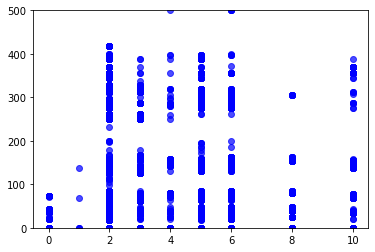

In [22]:
x = FFD["points"]
y = FFD["amount"]
plt.setp(plt.gca(), ylim=(0, 500))
plt.scatter(x, y, c='b', alpha=0.7)
plt.show()

In [23]:
#Test train split for supervised learning 
x_train , x_test , y_train , y_test = train_test_split(FFD.points , FFD.amount)

In [24]:
#Test train split Visualization 

[0.0, 500.0, 0.0, 12.0]

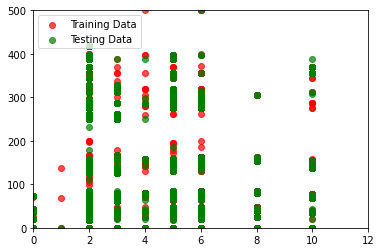

In [25]:
plt.scatter(x_train , y_train , label = "Training Data" , color= 'r' , alpha= .7)
plt.setp(plt.gca(), ylim=(0, 500), xlim=(0,12))
plt.scatter(x_test , y_test , label = 'Testing Data' , color= 'g' , alpha=.7 )
plt.setp(plt.gca(), ylim=(0, 500), xlim=(0,12))
plt.legend(loc='upper left');
plt.setp(plt.gca(), ylim=(0, 500), xlim=(0,12))

In [26]:
#Create linear model and train it 
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1),y_train.values)

LinearRegression()

In [27]:
#Use model to predict Test data 
Prediction = LR.predict(x_test.values.reshape(-1,1))

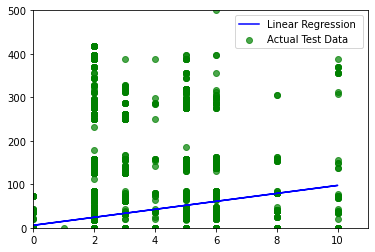

In [28]:
#Plot prediction line against actual Test data 
plt.plot(x_test, Prediction , label = 'Linear Regression ' , color='b' )
plt.scatter(x_test , y_test , label = 'Actual Test Data' , color='g',alpha=0.7)
plt.setp(plt.gca(), ylim=(0, 500), xlim=(0,11))
plt.legend()
plt.show()

In [29]:
#Predict the amount that will be paid if u have 4 points on your liscence 

LR.predict(np.array([[5]]))[0]

51.65953739857647

In [30]:
#Score this model 
LR.score(x_test.values.reshape(-1,1),y_test.values)

0.017575296170086574

In [35]:
new_pd =  FFD[['case:concept:name','concept:name','time:timestamp','amount','expense','totalPaymentAmount','vehicleClass','Dates','year','month','points']]
new_pd['total_required_amount'] =new_pd['amount'].groupby(new_pd['case:concept:name']).transform('sum')
new_pd['total_expense_amount'] = new_pd['expense'].groupby(new_pd['case:concept:name']).transform('sum')
new_pd['total_actual_amount'] = new_pd['totalPaymentAmount'].groupby(new_pd['case:concept:name']).transform('sum')
new_pd['Number_of_steps'] = new_pd['concept:name'].groupby(new_pd['case:concept:name']).transform('count')
new_pd['expense'] = new_pd['expense'].fillna(0)
new_pd['totalPaymentAmount'] = new_pd['totalPaymentAmount'].fillna(df['totalPaymentAmount'].median())


new_pd


<ipython-input-35-8226f0578dae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pd['total_required_amount'] =new_pd['amount'].groupby(new_pd['case:concept:name']).transform('sum')


,case:concept:name,concept:name,time:timestamp,amount,expense,totalPaymentAmount,vehicleClass,Dates,year,month,points,total_required_amount,total_expense_amount,total_actual_amount,Number_of_steps
0,A1,Create Fine,2006-07-24 00:00:00+02:00,35.0,0.00,0.0,A,2006-07-23,2006,7,0.0,35.0,11.00,0.0,2
1,A1,Send Fine,2006-12-05 00:00:00+01:00,0.0,11.00,0.0,A,2006-12-04,2006,12,0.0,35.0,11.00,0.0,2
2,A100,Create Fine,2006-08-02 00:00:00+02:00,35.0,0.00,0.0,A,2006-08-01,2006,8,0.0,106.5,11.00,0.0,5
3,A100,Send Fine,2006-12-12 00:00:00+01:00,0.0,11.00,0.0,A,2006-12-11,2006,12,0.0,106.5,11.00,0.0,5
4,A100,Insert Fine Notification,2007-01-15 00:00:00+01:00,0.0,0.00,0.0,A,2007-01-14,2007,1,0.0,106.5,11.00,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,V9999,Create Fine,2002-09-07 00:00:00+02:00,131.0,0.00,0.0,A,2002-09-06,2002,9,3.0,393.0,15.16,0.0,5
561466,V9999,Send Fine,2002-10-25 00:00:00+02:00,0.0,15.16,0.0,A,2002-10-24,2002,10,3.0,393.0,15.16,0.0,5
561467,V9999,Insert Fine Notification,2002-11-04 00:00:00+01:00,0.0,0.00,0.0,A,2002-11-03,2002,11,3.0,393.0,15.16,0.0,5
561468,V9999,Add penalty,2003-01-03 00:00:00+01:00,262.0,0.00,0.0,A,2003-01-02,2003,1,3.0,393.0,15.16,0.0,5


In [36]:
# High correlation found between number of process steps and both required amount and Expenses amount 
corr = new_pd.corr()
corr.style.background_gradient(cmap="BuPu")

,amount,expense,totalPaymentAmount,year,month,points,total_required_amount,total_expense_amount,total_actual_amount,Number_of_steps
amount,1.000000,-0.185641,-0.122906,0.006804,-0.019158,0.130254,0.492397,0.000964,0.045704,0.059788
expense,-0.185641,1.000000,-0.132959,0.040137,0.162482,-0.013192,-0.006359,0.279864,-0.066943,0.034270
totalPaymentAmount,-0.122906,-0.132959,1.000000,0.083725,0.029398,0.034991,-0.001535,-0.215468,0.449732,-0.144700
year,0.006804,0.040137,0.083725,1.000000,-0.084733,0.141941,0.034328,0.229582,0.099132,-0.080981
month,-0.019158,0.162482,0.029398,-0.084733,1.000000,0.001798,-0.011360,0.004555,0.049660,-0.027253
points,0.130254,-0.013192,0.034991,0.141941,0.001798,1.000000,0.251965,-0.050494,0.080573,0.027309
total_required_amount,0.492397,-0.006359,-0.001535,0.034328,-0.011360,0.251965,1.000000,0.092909,0.103686,0.285292
total_expense_amount,0.000964,0.279864,-0.215468,0.229582,0.004555,-0.050494,0.092909,1.000000,-0.115324,0.597824
total_actual_amount,0.045704,-0.066943,0.449732,0.099132,0.049660,0.080573,0.103686,-0.115324,1.000000,0.056230
Number_of_steps,0.059788,0.034270,-0.144700,-0.080981,-0.027253,0.027309,0.285292,0.597824,0.056230,1.000000


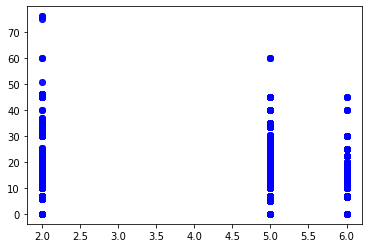

In [37]:
# We can predict how much we will spend depending on number of process steps 
x = new_pd["Number_of_steps"]
y = new_pd['total_expense_amount']
#plt.setp(plt.gca(), ylim=(2,8))
plt.scatter(x, y, c='b', alpha=0.7)
plt.show()

In [39]:
Number_of_steps=new_pd['Number_of_steps']
total_amount=new_pd['total_expense_amount']

x = np.array(Number_of_steps).reshape(-1, 1)
y = np.array(total_amount)

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)

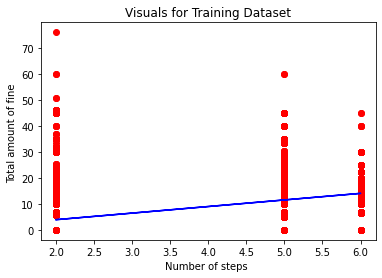

In [40]:

#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

#Predicting the prices
pred = regressor.predict(xtest)

#Visualizing the training Test Results 
plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Number of steps ")
plt.ylabel("Total amount of fine ")
plt.show()



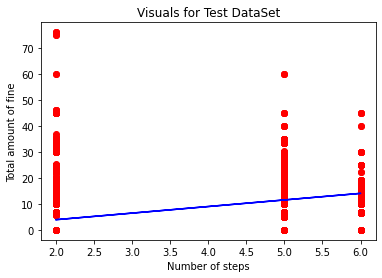

In [41]:
#Visualizing the Test Results 
plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Number of steps")
plt.ylabel("Total amount of fine")
plt.show()

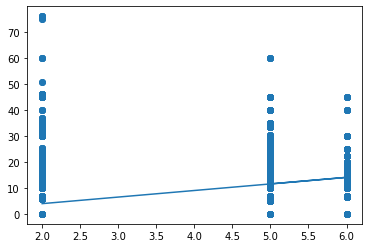

In [42]:
#we can find the correlation between number of steps of each process and the total expense

import matplotlib.pyplot as plt
from scipy import stats

 
x=new_pd["Number_of_steps"]
y=new_pd["total_expense_amount"]

slope, intercept, r, p, std_err = stats.linregress(x, y)


def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [43]:
print(r)

0.5978242691366102


In [44]:
#predict expenses based on number of steps 
fine = myfunc(10)

print(fine)

24.16467883710157
